In [1]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=9
import matplotlib.pyplot as plt
import matplotlib
import pickle
import os
import numpy as np
import sys
sys.path.append("..")
from scripts.utils import get_path
from vis_utils.loaders import load_dataset
from vis_utils.plot import  plot_scatter


env: CUDA_VISIBLE_DEVICES=9


In [2]:
root_path = get_path("data")
fig_path = get_path("figures")

In [3]:
# parameters for all methods
a = 1.0
b = 1.0
seed = 0
n_noise = 5
k = 15
n_epochs = 750
rescale = 1.0
batch_size = 1024
parametric = False
optimizer = "sgd"
lr_min_factor = 0.0
momentum = 0.0
init_str = f"pca_rescale_{rescale}"
noise_in_estimator = 1.0

In [4]:
# set up matplotlib
plt.style.use("default")
matplotlib.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.serif'] = "Times New Roman"
cmap = matplotlib.cm.get_cmap("tab10")

In [5]:
dataset= "mnist"
x, y, sknn_graph, pca2 = load_dataset(root_path, dataset, k)

# Clamp arguments of log

In [6]:
clamp_low_vals = [1e-3, 1e-4, 1e-5, 1e-6, 1e-8, 1e-10, 0.0]


# Neg sample

In [7]:
loss_mode = "neg_sample"
anneal_lr = False

embedders_neg_no_anneal = []
for clamp_low in clamp_low_vals:
    file_name = os.path.join(root_path,
                             dataset,
                             f"cne_{loss_mode}_n_noise_{n_noise}_noise_in_estimator_{noise_in_estimator}_n_epochs_{n_epochs}_init_{init_str}_bs_{batch_size}"
                             f"_optim_{optimizer}_anneal_lr_{anneal_lr}_lr_min_factor_{lr_min_factor}_momentum_{momentum}_param_{parametric}_clamp_low_{clamp_low}_seed_{seed}.pkl"
                             )

    with open(file_name, "rb") as file:
        embedder = pickle.load(file)

    embedders_neg_no_anneal.append(embedder)


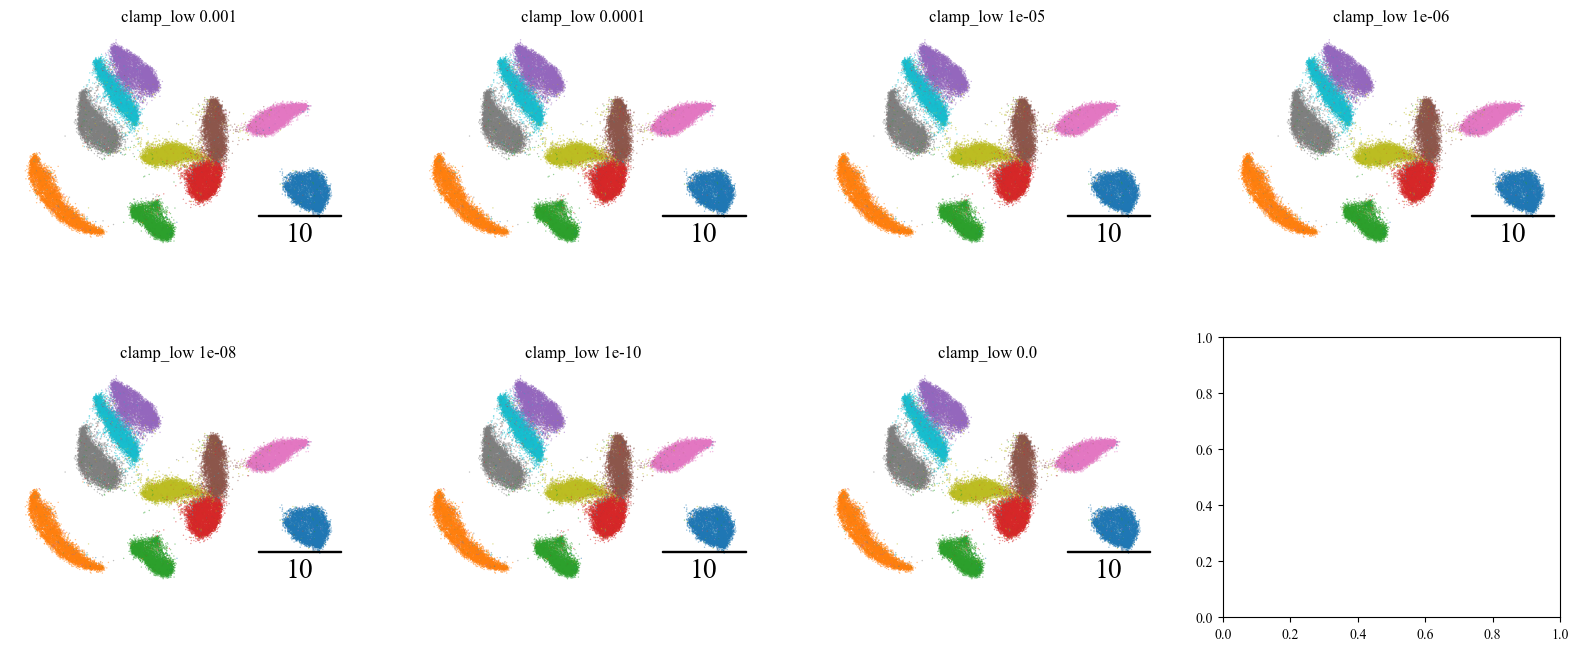

In [8]:
n_rows = 2
n_cols = 4
fig, ax = plt.subplots(n_rows,n_cols, figsize=(20,8))
n_exp = len(embedders_neg_no_anneal)
for i in range(n_exp):
    embd = embedders_neg_no_anneal[i].callback.embds[-1]
    cax = ax[int(i / n_cols), i % n_cols]
    cax = plot_scatter(cax, embd, y, f"clamp_low {clamp_low_vals[i]}")


In [10]:
for i in [1, -2,-1]:
    plt.figure(figsize=(5,5))
    plot_scatter(plt.gca(), embedders_neg_no_anneal[i].callback.embds[-1], y)
    plt.savefig(os.path.join(fig_path,
                         f"neg_mnist_no_anneal_clamp_{clamp_low_vals[i]}.png"),
            bbox_inches='tight',
            pad_inches=0,
            dpi=200,
            transparent=False,
            facecolor='white')
    plt.close()

In [11]:
loss_mode = "neg_sample"
anneal_lr = True

embedders_neg_anneal = []
for clamp_low in clamp_low_vals:
    file_name = os.path.join(root_path,
                             dataset,
                             f"cne_{loss_mode}_n_noise_{n_noise}_noise_in_estimator_{noise_in_estimator}_n_epochs_{n_epochs}_init_{init_str}_bs_{batch_size}"
                             f"_optim_{optimizer}_anneal_lr_{anneal_lr}_lr_min_factor_{lr_min_factor}_momentum_{momentum}_param_{parametric}_clamp_low_{clamp_low}_seed_{seed}.pkl"
                             )

    with open(file_name, "rb") as file:
        embedder = pickle.load(file)

    embedders_neg_anneal.append(embedder)


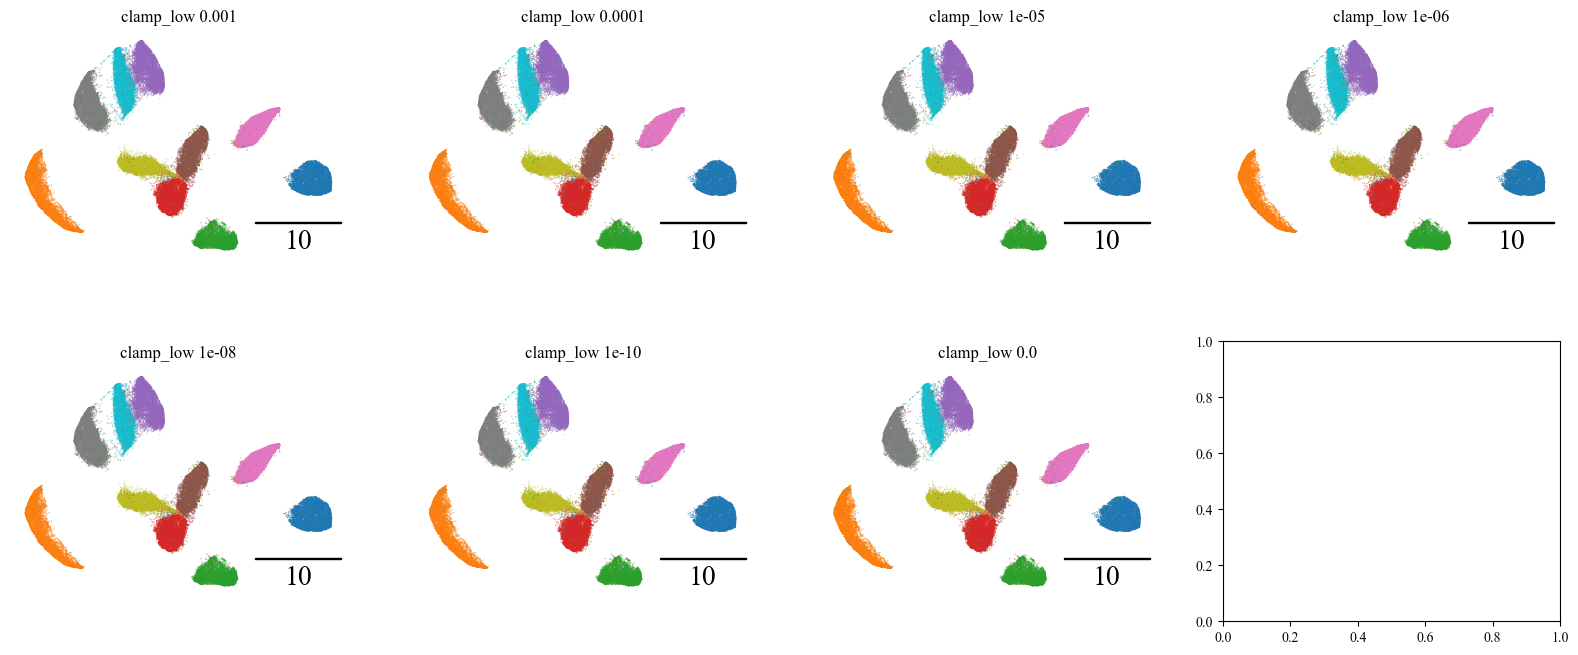

In [12]:
n_rows = 2
n_cols = 4
fig, ax = plt.subplots(n_rows,n_cols, figsize=(20,8))
n_exp = len(embedders_neg_anneal)
for i in range(n_exp):
    embd = embedders_neg_anneal[i].callback.embds[-1]
    cax = ax[int(i / n_cols), i % n_cols]
    cax = plot_scatter(cax, embd, y, f"clamp_low {clamp_low_vals[i]}")

In [13]:
for i in [1, -2,-1]:
    plt.figure(figsize=(5,5))
    plot_scatter(plt.gca(), embedders_neg_anneal[i].callback.embds[-1], y)
    plt.savefig(os.path.join(fig_path,
                         f"neg_mnist_anneal_clamp_{clamp_low_vals[i]}.png"),
            bbox_inches='tight',
            pad_inches=0,
            dpi=200,
            transparent=False,
            facecolor='white')
    plt.close()

### UMAP

In [18]:
loss_mode = "umap"
anneal_lr = False

embedders_umap_no_anneal = []
for clamp_low in clamp_low_vals:
    file_name = os.path.join(root_path,
                             dataset,
                             f"cne_{loss_mode}_n_noise_{n_noise}_noise_in_estimator_{noise_in_estimator}_n_epochs_{n_epochs}_init_{init_str}_bs_{batch_size}"
                             f"_optim_{optimizer}_anneal_lr_{anneal_lr}_lr_min_factor_{lr_min_factor}_momentum_{momentum}_param_{parametric}_clamp_low_{clamp_low}_seed_{seed}.pkl"
                             )

    with open(file_name, "rb") as file:
        embedder = pickle.load(file)

    embedders_umap_no_anneal.append(embedder)


In [ ]:
n_rows = 2
n_cols = 4
fig, ax = plt.subplots(n_rows,n_cols, figsize=(20,8))
n_exp = len(embedders_umap_no_anneal)
for i in range(n_exp):
    embd = embedders_umap_no_anneal[i].callback.embds[-1]
    cax = ax[int(i / n_cols), i % n_cols]
    cax = plot_scatter(cax, embd, y, f"clamp_low {clamp_low_vals[i]}")


In [19]:
for i in [1, -2]:
    plt.figure(figsize=(5,5))
    plot_scatter(plt.gca(), embedders_umap_no_anneal[i].callback.embds[-1], y)
    plt.savefig(os.path.join(fig_path,
                         f"umap_mnist_no_anneal_clamp_{clamp_low_vals[i]}.png"),
            bbox_inches='tight',
            pad_inches=0,
            dpi=200,
            transparent=False,
            facecolor='white')
    plt.close()

In [20]:
loss_mode = "umap"
anneal_lr = True

embedders_umap_anneal = []
for clamp_low in clamp_low_vals:
    file_name = os.path.join(root_path,
                             dataset,
                             f"cne_{loss_mode}_n_noise_{n_noise}_noise_in_estimator_{noise_in_estimator}_n_epochs_{n_epochs}_init_{init_str}_bs_{batch_size}"
                             f"_optim_{optimizer}_anneal_lr_{anneal_lr}_lr_min_factor_{lr_min_factor}_momentum_{momentum}_param_{parametric}_clamp_low_{clamp_low}_seed_{seed}.pkl"
                             )

    with open(file_name, "rb") as file:
        embedder = pickle.load(file)

    embedders_umap_anneal.append(embedder)


In [ ]:
n_rows = 2
n_cols = 4
fig, ax = plt.subplots(n_rows,n_cols, figsize=(20,8))
n_exp = len(embedders_umap_anneal)
for i in range(n_exp):
    embd = embedders_umap_anneal[i].callback.embds[-1]
    cax = ax[int(i / n_cols), i % n_cols]
    cax = plot_scatter(cax, embd, y, f"clamp_low {clamp_low_vals[i]}")


In [22]:
for i in [1, -2]:
    plt.figure(figsize=(5,5))
    plot_scatter(plt.gca(), embedders_umap_anneal[i].callback.embds[-1], y)
    plt.savefig(os.path.join(fig_path,
                         f"umap_mnist_anneal_clamp_{clamp_low_vals[i]}.png"),
            bbox_inches='tight',
            pad_inches=0,
            dpi=200,
            transparent=False,
            facecolor='white')
    plt.close()

# Vary eps in the non-parametric UMAP code
(different from the clamp value in the logarithm function, working directy on the gradient here)

In [22]:
epsilons_umap = [10.0, 1.0, 0.1, 0.01, 0.001, 0.0001, 0.00001, 1e-10, 0.0]

In [23]:
anneal_lr = True

umappers_eps_anneal = []
for eps in epsilons_umap:
    filename = os.path.join(root_path, dataset, f"umap_bin_k_{k}_n_epochs_{n_epochs}_anneal_lr_{anneal_lr}_eps_{eps}_seed_{seed}_a_{a}_b_{b}_init_pca_rescaled_{rescale}.pkl")
    with open(filename, "rb") as file:
            umapper = pickle.load(file)

    umappers_eps_anneal.append(umapper)

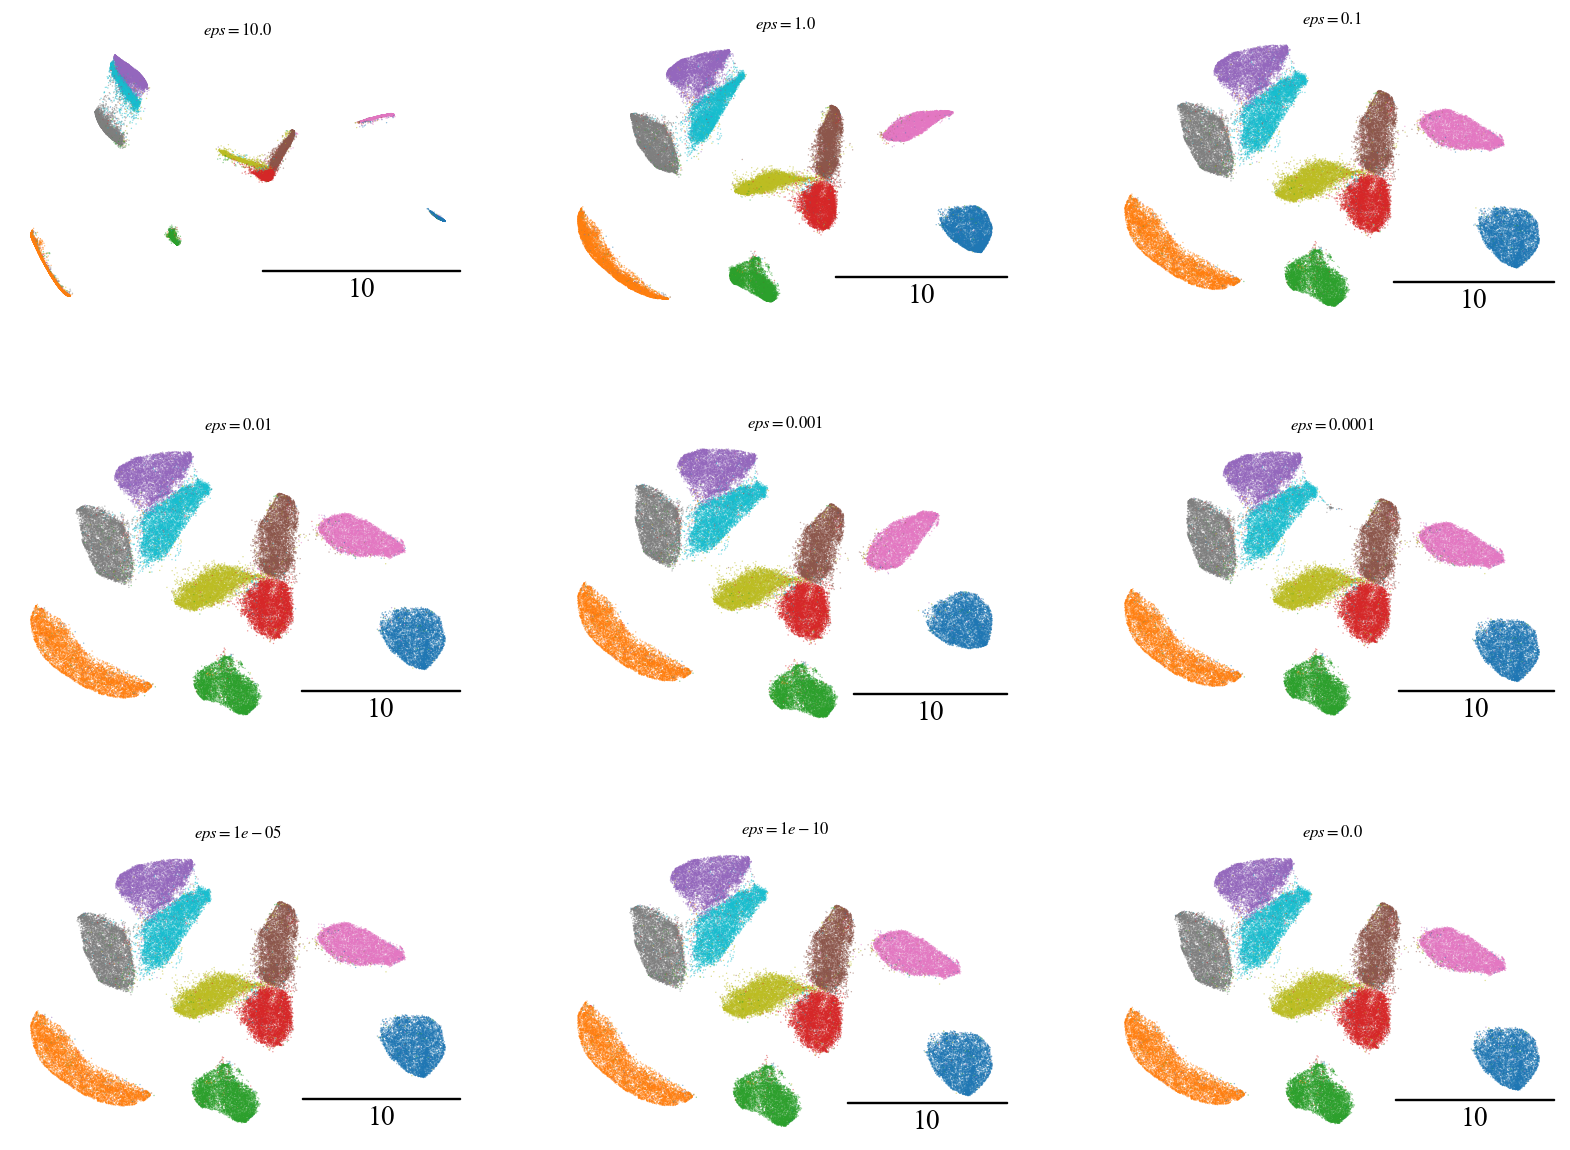

In [24]:
ncols = 3
fig, ax = plt.subplots(3,ncols, figsize=(20,15))
plt.rcParams['font.size'] = 10

n_exp = len(epsilons_umap)
for i in range(n_exp):
    embd = umappers_eps_anneal[i].aux_data["embeddings"][-1]
    cax = ax[int(i / ncols), i % ncols]
    plot_scatter(cax, embd, y, rf"$eps={epsilons_umap[i]}$")



In [26]:
for i in [4, -2,-1]:
    plt.figure(figsize=(5,5))
    plot_scatter(plt.gca(), umappers_eps_anneal[i].aux_data["embeddings"][-1], y)
    plt.savefig(os.path.join(fig_path,
                         f"umap_mnist_anneal_eps_{epsilons_umap[i]}.png"),
            bbox_inches='tight',
            pad_inches=0,
            dpi=200,
            transparent=False,
            facecolor='white')
    plt.close()

In [25]:
anneal_lr = False

umappers_eps_no_anneal = []
for eps in epsilons_umap:
    filename = os.path.join(root_path, dataset, f"umap_bin_k_{k}_n_epochs_{n_epochs}_anneal_lr_{anneal_lr}_eps_{eps}_seed_{seed}_a_{a}_b_{b}_init_pca_rescaled_{rescale}.pkl")
    with open(filename, "rb") as file:
            umapper = pickle.load(file)

    umappers_eps_no_anneal.append(umapper)

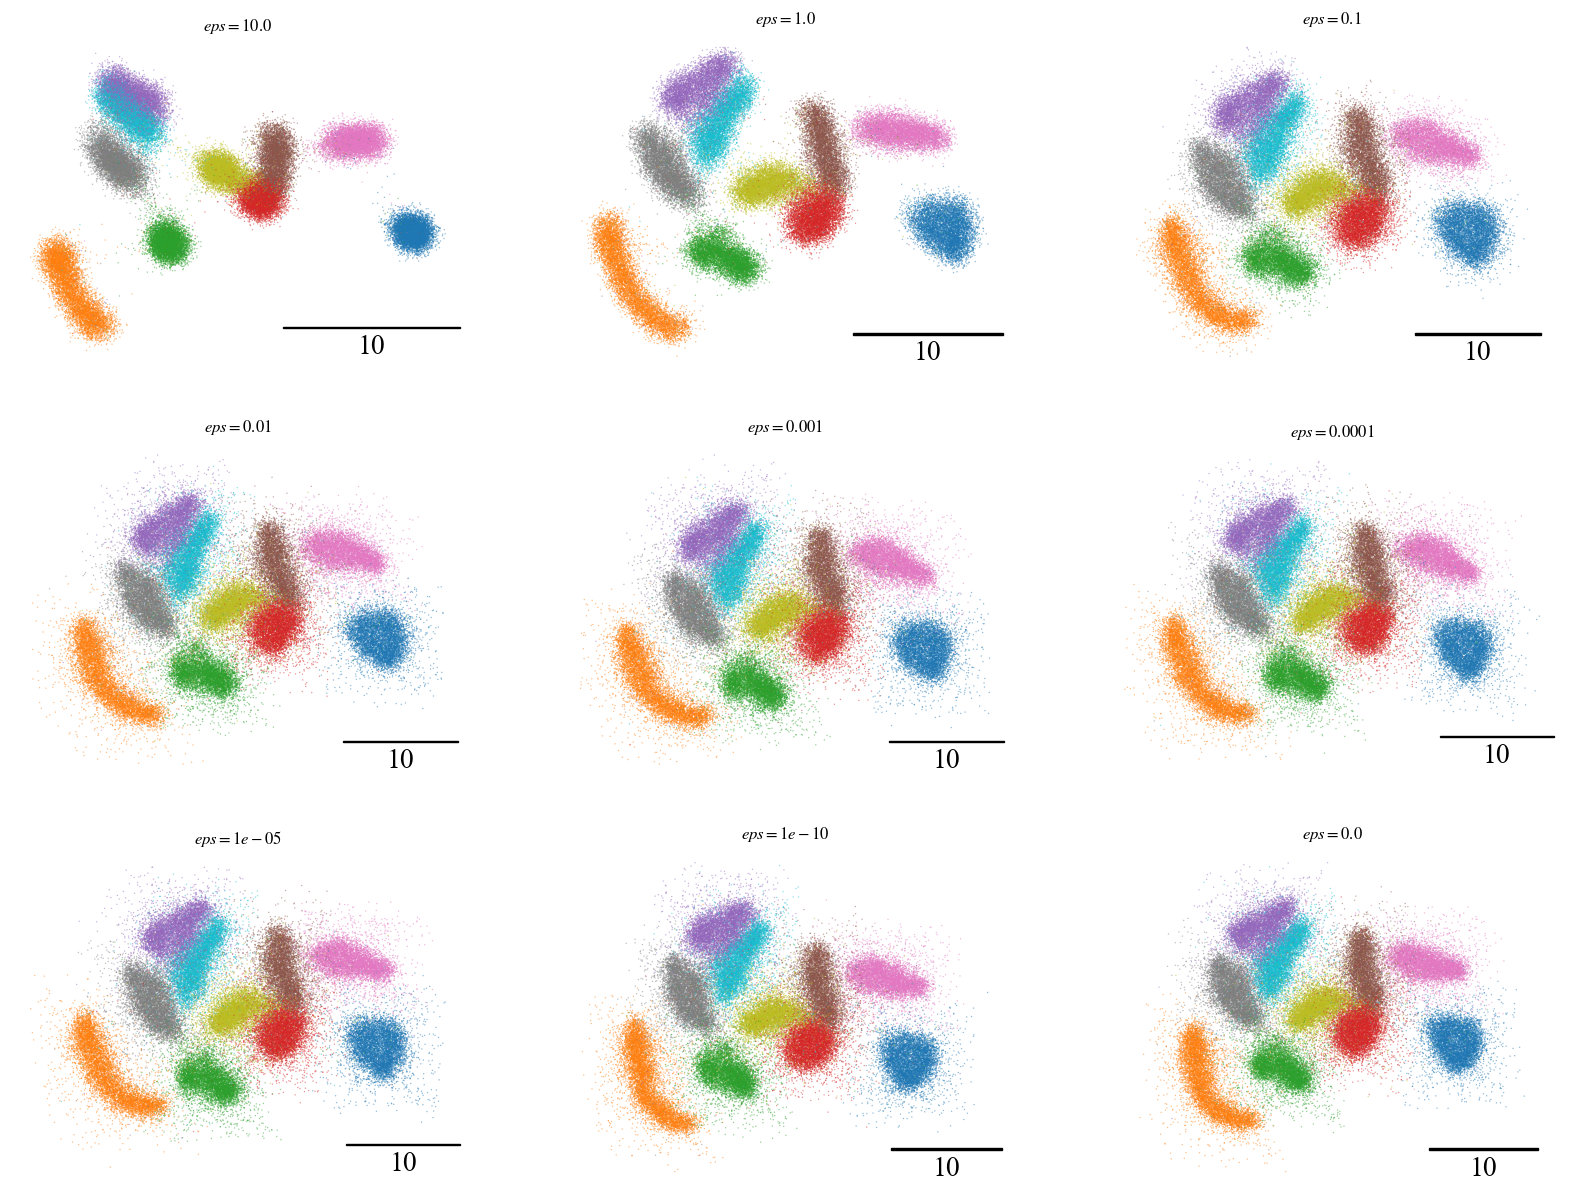

In [26]:
ncols = 3
fig, ax = plt.subplots(3,ncols, figsize=(20,15))
plt.rcParams['font.size'] = 10

n_exp = len(epsilons_umap)
for i in range(n_exp):
    embd = umappers_eps_no_anneal[i].aux_data["embeddings"][-1]
    cax = ax[int(i / ncols), i % ncols]
    plot_scatter(cax, embd, y, rf"$eps={epsilons_umap[i]}$")

In [29]:
for i in [4, -2,-1]:
    plt.figure(figsize=(5,5))
    plot_scatter(plt.gca(), umappers_eps_no_anneal[i].aux_data["embeddings"][-1], y)
    plt.savefig(os.path.join(fig_path,
                         f"umap_mnist_no_anneal_eps_{epsilons_umap[i]}.png"),
            bbox_inches='tight',
            pad_inches=0,
            dpi=200,
            transparent=False,
            facecolor='white')
    plt.close()